Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow_addons.metrics import RSquare

Loading the Dataset CSV file using pd.read_csv

In [2]:
games_sales_data = pd.read_csv('vgsales.csv', index_col='Rank')
games_sales_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [3]:
games_sales_data.shape


(16598, 10)

In [4]:
games_sales_data.describe() #describe() will collectively return the basic information about the dataset 

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Preprocessing the Data

In [5]:
cols_to_drop = ['Name','NA_Sales','EU_Sales', 'JP_Sales',	'Other_Sales']
games_sales_data.drop(cols_to_drop,  axis = 1 ,inplace = True)
games_sales_data


,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [6]:
games_sales_data.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [7]:
games_sales_data['Year'].fillna(games_sales_data['Year'].mean()) #filling the null values the mean value of the Year
games_sales_data = games_sales_data.dropna(axis=0) #dropping the rows that has null text values because we have enough train samples


In [8]:
games_sales_data.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [9]:
games_sales_data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
games_sales_data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
games_sales_data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [12]:
count = games_sales_data['Publisher'].value_counts()
games_sales_data['Publisher']  = games_sales_data['Publisher'].apply(lambda x: 'Publisher Count Less than 50' if count[x]<50 else x)

C:\Users\mithu\AppData\Local\Temp/ipykernel_1700/283535813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_sales_data['Publisher']  = games_sales_data['Publisher'].apply(lambda x: 'Publisher Count Less than 50' if count[x]<50 else x)


In [13]:
games_sales_data['Publisher'].value_counts()

Publisher Count Less than 50              3319
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Enter

In [14]:
Onehotcol = ['Platform', 'Genre','Publisher']

In [15]:
def onehot_encode(games_sales_data,columns):
    for column in columns:
        dummies = pd.get_dummies(games_sales_data[column])
        games_sales_data =pd.concat([games_sales_data,dummies], axis=1)
        games_sales_data.drop(column, axis=1, inplace = True)
    return games_sales_data

In [16]:
games_sales_data =  onehot_encode(games_sales_data, Onehotcol)


In [17]:
games_sales_data

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985.0,40.24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1996.0,31.37,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Scaling

In [18]:
y =games_sales_data['Global_Sales']
X = games_sales_data.drop('Global_Sales',axis=1)

In [19]:
X

,Year,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1996.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [21]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.069538,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,-0.225152,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
1,-3.670217,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,-0.225152,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
2,0.273384,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,-0.225152,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
3,0.444845,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,-0.225152,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
4,-1.784147,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,12.920853,-0.225152,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,-0.755382,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,4.441448,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
16287,-0.583921,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,-0.225152,5.390473,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
16288,0.273384,-0.084685,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,-0.225152,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
16289,0.616306,-0.084685,-0.013571,-0.177759,-0.056588,2.577745,-0.077394,-0.225152,-0.185512,-0.040744,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156


In [22]:
X.shape

(16291, 91)

Training the model

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8)


In [24]:
inputs = tf.keras.Input(shape=(91,))
x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(128,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,    
    loss='mse'
)


batch_size = 64
epochs  = 100

history = model.fit( 
     X_train,
     y_train, 
     validation_split = 0.2, 
     batch_size = batch_size, 
     epochs = epochs, 
     verbose = 0
)



Result

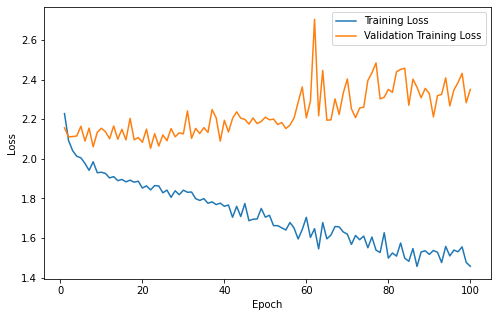

In [35]:
plt.figure(figsize=(8,5))
epochs_range = range(1,epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs_range, train_loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [37]:
y_pred = np.squeeze(model.predict(X_test))
result = RSquare()
result.update_state(y_test, y_pred)
print("R2 Score:",result.result())

R2 Score: tf.Tensor(0.10752499, shape=(), dtype=float32)
